In [19]:
import pandas as pd 
import matplotlib.pyplot as plt 
import os 

In [25]:
pwd  #shows the default directory where this file has been saved 

'C:\\Users\\Kiran\\Desktop\\EDA & Feature Engineering'

In [28]:
df=pd.read_csv(r"C:\Users\Kiran\Desktop\EDA & Feature Engineering\IQR\weight-height.csv")
df.sample(10)

,Gender,Height,Weight
9341,Female,64.587522,150.817036
7995,Female,58.145653,112.035274
9149,Female,65.454875,142.458735
4122,Male,65.978976,168.450366
199,Male,71.156053,188.271456
8464,Female,71.070451,182.083580
345,Male,70.764720,199.323094
5379,Female,57.882978,110.725972
1142,Male,66.560741,162.018088
7171,Female,59.026256,106.370539


In [29]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


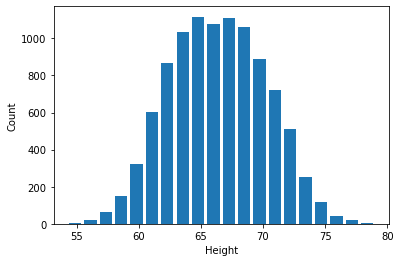

In [56]:
df['Height'].plot(kind='hist',bins=20,rwidth=0.8)
plt.xlabel("Height")
plt.ylabel("Count")
plt.show()

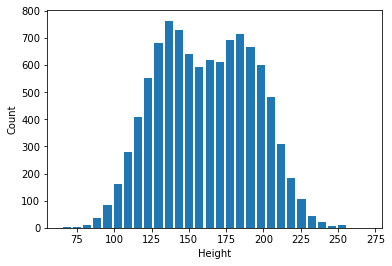

In [57]:
df['Weight'].plot(kind='hist',bins=30,rwidth=0.8)
plt.xlabel("Height")
plt.ylabel("Count")
plt.show()

### Detecting and Removing the outliers by using IQR

### Height 

In [46]:
Q3=df.Height.quantile(0.75)
Q1=df.Height.quantile(0.25)

print(Q3)
print(Q1)

69.1742617268347
63.505620481218955


In [47]:
IQR=Q3 -Q1
IQR

5.668641245615746

In [48]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3 +1.5*IQR

print(lower_limit)
print(upper_limit)

55.00265861279534
77.67722359525831


Anything less than a lower limit or above the upper limit is considered outlier.

In [49]:
Q3=df.Weight.quantile(0.75)
Q1=df.Weight.quantile(0.25)

print(Q3)
print(Q1)

187.16952486868348
135.8180513055015


In [50]:
IQR=Q3 -Q1
IQR

51.35147356318197

In [51]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3 +1.5*IQR

print(lower_limit)
print(upper_limit)

58.79084096072856
264.19673521345646


In [59]:
df[(df.Weight<lower_limit)|(df.Weight>upper_limit)]

,Gender,Height,Weight
2014,Male,78.998742,269.989699


In [62]:
df[(df.Height<lower_limit)|(df.Height>upper_limit)]

,Gender,Height,Weight
4794,Male,58.406905,121.338323
5014,Female,58.438249,98.192621
5026,Female,56.547975,84.872124
5074,Female,56.159458,90.815256
5122,Female,57.103869,93.506316
...,...,...,...
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551
9913,Female,58.351003,110.122151
9922,Female,58.752489,106.846041
